
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Amirabbas Afzali 

____

# Personal Data

In [1]:
# Set your student number
student_number = '400110009'
Name = 'Zahra'
Last_Name = 'Maleki'

# Rules
- Make sure that all of your cells can be run perfectly. 
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens. 
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


In [22]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from datasets import load_dataset
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets import load_dataset, Dataset, DatasetDict
from transformers import GPT2Tokenizer, GPT2LMHeadModel, BertTokenizer, BertForSequenceClassification

Load `gpt2` model:

1.

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer.pad_token = tokenizer.eos_token

model = GPT2LMHeadModel.from_pretrained("gpt2").to("cuda")

print(model)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


2.

In [4]:
input_sentences = [
    "The weather today is", 
    "Electrical Engineering is", 
    "The capital of France is", 
    "The movie was", 
    "Python programming is"
]

# Define configurations for text generation
generation_configurations = {
    "temperature": 0.7,
    "top_k": 50,
    "top_p": 0.9,
    "repetition_penalty": 1.2,
    "num_beams": 3,
    "max_length": 50
}

# Generate outputs and display them
print("Generated outputs:")
for i, sentence in enumerate(input_sentences):
    # Tokenize input
    input_ids = tokenizer.encode(sentence, return_tensors="pt").to("cuda")

    # Generate output using the specified configurations
    outputs = model.generate(
        input_ids,
        temperature=generation_configurations["temperature"],
        top_k=generation_configurations["top_k"],
        top_p=generation_configurations["top_p"],
        repetition_penalty=generation_configurations["repetition_penalty"],
        num_beams=generation_configurations["num_beams"],
        max_length=generation_configurations["max_length"],
        no_repeat_ngram_size=2
    )

    # Decode and print the output
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Input {i+1}: {sentence}")
    print(f"Generated: {generated_text}\n")


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpec

Generated outputs:


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input 1: The weather today is
Generated: The weather today is pretty good, so I'm going to go out and get some ice cream.

I'll be back in a couple of hours. I'll see you guys soon.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input 2: Electrical Engineering is
Generated: Electrical Engineering is an industry with a long history of innovation and innovation in the field of electrical engineering. We are proud to be a part of this industry and we look forward to working with you to bring you the best products and services.





The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input 3: The capital of France is
Generated: The capital of France is now home to more than 100,000 people.

The French government has said it wants to increase the number of asylum seekers from Syria, Iraq and Afghanistan.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input 4: The movie was
Generated: The movie was released in the United States on May 4, 2013.

The film is based on the novel of the same name by David Foster Wallace.

Input 5: Python programming is
Generated: Python programming is a great way to learn about programming languages, but it's not the only way. There are many other ways to get started with programming.

The first step is to understand the basics of programming and how it works. This is



### **Key Configurations in Text Generation**

1. **`Temperature`**: Controls randomness; lower values make output deterministic, higher values add diversity.  
2. **`top_k`**: Limits token sampling to the top `k` most likely tokens (e.g., `top_k=50` ensures coherence).  
3. **`top_p`**: Filters tokens dynamically to include only those with cumulative probability ≤ `top_p` (e.g., `0.9`).  
4. **`repetition_penalty`**: Discourages repetitive tokens (values >1 reduce redundancy).  
5. **`num_beams`**: Number of beams for beam search; higher values improve quality but are slower.  
6. **`no_repeat_ngram_size`**: Prevents repetition of n-grams of specified size (e.g., 2-grams).  

These settings balance coherence, diversity, and efficiency in generation.

3.

Load `sst-2` dataset:

In [5]:
dataset = load_dataset("glue", "sst2")

def balance_dataset(dataset):
    label_0 = [example for example in dataset["train"] if example["label"] == 0]
    label_1 = [example for example in dataset["train"] if example["label"] == 1]
    min_count = min(len(label_0), len(label_1))
    balanced_train = label_0[:min_count] + label_1[:min_count]
    balanced_dataset = Dataset.from_dict({
        "sentence": [example["sentence"] for example in balanced_train],
        "label": [example["label"] for example in balanced_train]
    })
    return DatasetDict({"train": balanced_dataset, "validation": dataset["validation"], "test": dataset["test"]})

dataset = balance_dataset(dataset)

def inspect_label_distribution(dataset):
    label_counts = {0: 0, 1: 0}
    for example in dataset["train"]:
        label_counts[example["label"]] += 1
    print(f"Label Distribution: {label_counts}")

inspect_label_distribution(dataset)

def tokenize_and_pad(examples):
    inputs = tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128, return_tensors="pt")
    inputs["labels"] = examples["label"]
    return inputs

tokenized_dataset = dataset.map(tokenize_and_pad, batched=True)

tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

print("SST-2 dataset loaded, balanced, and tokenized successfully!")


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Label Distribution: {0: 29780, 1: 29780}


Map:   0%|          | 0/59560 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

SST-2 dataset loaded, balanced, and tokenized successfully!


4.

In [6]:
train_dataloader = DataLoader(tokenized_dataset["train"], batch_size=16, shuffle=True)
validation_dataloader = DataLoader(tokenized_dataset["validation"], batch_size=16)

In [7]:
class ModifiedGPT2Model(torch.nn.Module):
    def __init__(self, original_model):
        super(ModifiedGPT2Model, self).__init__()
        self.transformer = original_model.transformer
        self.cls_layer = nn.Linear(original_model.config.n_embd, 2)  # Classifier layer

    def forward(self, input_ids, attention_mask):
        transformer_outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = transformer_outputs.last_hidden_state[:, 0, :]  # Extract CLS embedding
        logits = self.cls_layer(cls_embedding)  # Apply classification layer
        return logits

# Instantiate the modified model
modified_model = ModifiedGPT2Model(model).to("cuda")
print("Final layer removed and replaced with a classification layer using CLS token.")

Final layer removed and replaced with a classification layer using CLS token.


In [7]:
# Training and evaluation for Step 4
num_epochs = 2
learning_rate = 2e-5

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(modified_model.parameters(), lr=learning_rate)

training_loss = []
training_accuracy = []

for epoch in range(num_epochs):
    modified_model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for batch_idx, batch in enumerate(train_dataloader):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        optimizer.zero_grad()
        logits = modified_model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        if (batch_idx + 1) % 1000 == 0:
            print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}: Loss = {loss.item():.4f}")

    epoch_accuracy = correct / total
    training_loss.append(epoch_loss / len(train_dataloader))
    training_accuracy.append(epoch_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {training_loss[-1]:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch 1, Batch 1000: Loss = 0.6582
Epoch 1, Batch 2000: Loss = 0.6491
Epoch 1, Batch 3000: Loss = 0.6397
Epoch 1/2, Loss: 0.6698, Accuracy: 0.5725
Epoch 2, Batch 1000: Loss = 0.8353
Epoch 2, Batch 2000: Loss = 0.7141
Epoch 2, Batch 3000: Loss = 0.6758
Epoch 2/2, Loss: 0.6419, Accuracy: 0.6076


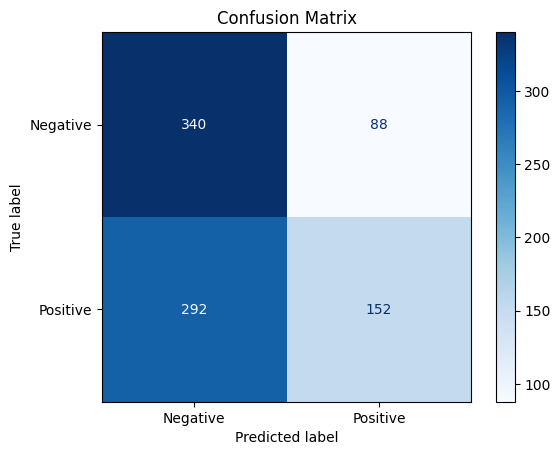

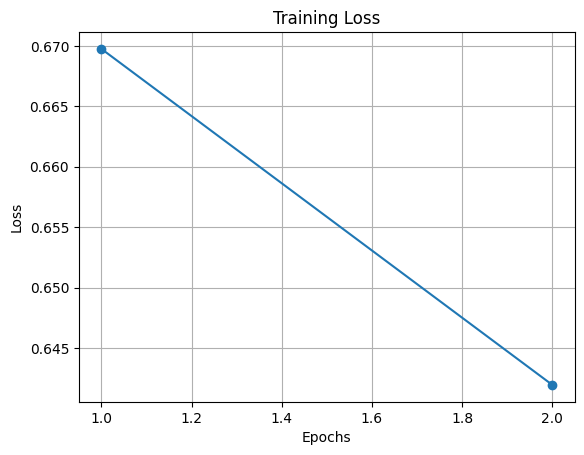

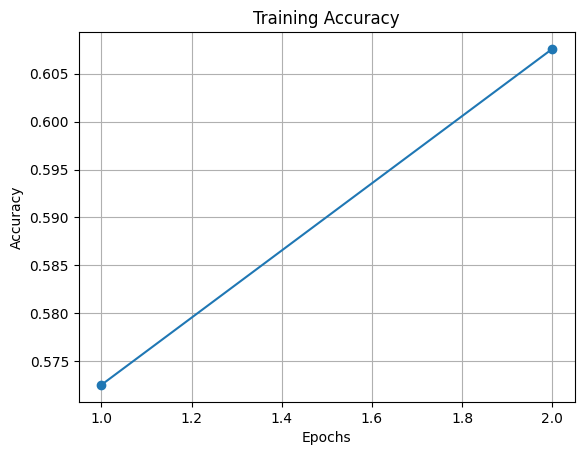

In [8]:
# Evaluate on validation set
modified_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        logits = modified_model(input_ids, attention_mask)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
        

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot training loss
plt.figure()
plt.plot(range(1, num_epochs + 1), training_loss, marker="o", label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Plot training accuracy
plt.figure()
plt.plot(range(1, num_epochs + 1), training_accuracy, marker="o", label="Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

5. 

In [8]:
class AggregatedGPT2Model(torch.nn.Module):
    def __init__(self, original_model):
        super(AggregatedGPT2Model, self).__init__()
        self.transformer = original_model.transformer
        self.aggregation_layer = nn.Linear(original_model.config.n_embd, original_model.config.n_embd)
        self.classifier = nn.Linear(original_model.config.n_embd, 2)

    def forward(self, input_ids, attention_mask):
        transformer_outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = transformer_outputs.last_hidden_state[:, 0, :]  # Extract CLS embedding
        aggregated_output = self.aggregation_layer(cls_embedding)  # Aggregate token information
        logits = self.classifier(aggregated_output)  # Apply classification layer
        return logits

aggregated_model = AggregatedGPT2Model(model).to("cuda")
print("Linear aggregation layer added on top of CLS token.")

Linear aggregation layer added on top of CLS token.


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(aggregated_model.parameters(), lr=learning_rate)

training_loss = []
training_accuracy = []

for epoch in range(num_epochs):
    aggregated_model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for batch_idx, batch in enumerate(train_dataloader):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        optimizer.zero_grad()
        logits = aggregated_model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        if (batch_idx + 1) % 1000 == 0:
            print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}: Loss = {loss.item():.4f}")

    epoch_accuracy = correct / total
    training_loss.append(epoch_loss / len(train_dataloader))
    training_accuracy.append(epoch_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {training_loss[-1]:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch 1, Batch 1000: Loss = 0.6407
Epoch 1, Batch 2000: Loss = 0.6406
Epoch 1, Batch 3000: Loss = 0.5983
Epoch 1/2, Loss: 0.6342, Accuracy: 0.6172
Epoch 2, Batch 1000: Loss = 0.7510
Epoch 2, Batch 2000: Loss = 0.6288
Epoch 2, Batch 3000: Loss = 0.7830
Epoch 2/2, Loss: 0.6263, Accuracy: 0.6237


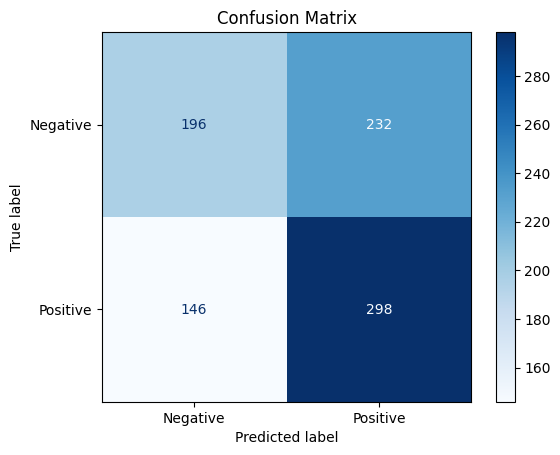

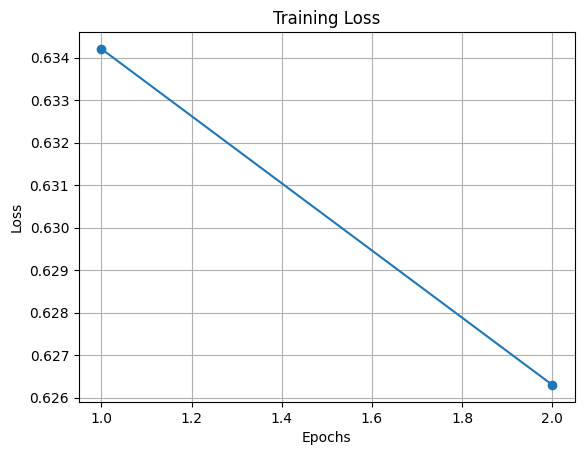

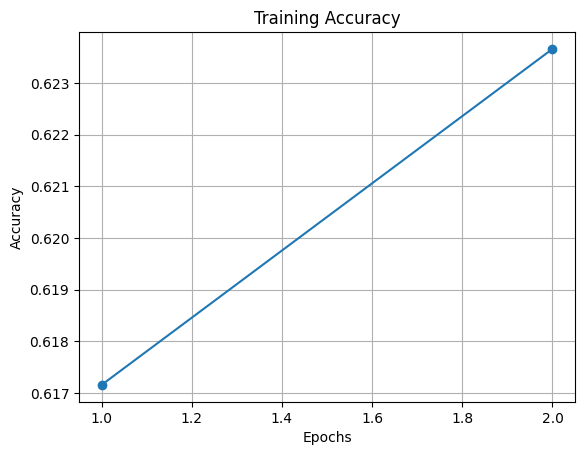

In [12]:
# Evaluate on validation set
aggregated_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_idx, batch in enumerate(validation_dataloader):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        logits = aggregated_model(input_ids, attention_mask)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

        if (batch_idx + 1) % 500 == 0:
            print(f"Validation Batch {batch_idx + 1}: Processed")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot training loss
plt.figure()
plt.plot(range(1, num_epochs + 1), training_loss, marker="o", label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Plot training accuracy
plt.figure()
plt.plot(range(1, num_epochs + 1), training_accuracy, marker="o", label="Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

6.

In [9]:
class BidirectionalAttentionModel(torch.nn.Module):
    def __init__(self, original_model, num_attention_heads):
        super(BidirectionalAttentionModel, self).__init__()
        self.transformer = original_model.transformer
        self.attention = nn.MultiheadAttention(embed_dim=original_model.config.n_embd, num_heads=num_attention_heads)
        self.classifier = nn.Linear(original_model.config.n_embd, 2)

    def forward(self, input_ids, attention_mask):
        transformer_outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = transformer_outputs.last_hidden_state[:, 0, :]  # Extract CLS embedding
        attn_output, _ = self.attention(cls_embedding.unsqueeze(1), cls_embedding.unsqueeze(1), cls_embedding.unsqueeze(1))
        logits = self.classifier(attn_output.squeeze(1))
        return logits

# Instantiate the bidirectional attention model
bidirectional_model = BidirectionalAttentionModel(model, num_attention_heads=12).to("cuda")
print("Bidirectional attention layer added.")

Bidirectional attention layer added.


In [10]:
# Training and evaluation for Step 6
num_epochs = 3
learning_rate = 2e-5

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(bidirectional_model.parameters(), lr=learning_rate)

training_loss = []
training_accuracy = []

for epoch in range(num_epochs):
    bidirectional_model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for batch_idx, batch in enumerate(train_dataloader):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        optimizer.zero_grad()
        logits = bidirectional_model(input_ids, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        if (batch_idx) % 1000 == 0:
            print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}: Loss = {loss.item():.4f}")


    epoch_accuracy = correct / total
    training_loss.append(epoch_loss / len(train_dataloader))
    training_accuracy.append(epoch_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {training_loss[-1]:.4f}, Accuracy: {epoch_accuracy:.4f}")

    torch.save(bidirectional_model.state_dict(), f"bidirectional_model_epoch_{epoch + 1}.pth")
    print(f"Model saved after epoch {epoch + 1}")


Epoch 1, Batch 1: Loss = 1.1992
Epoch 1, Batch 1001: Loss = 0.6974
Epoch 1, Batch 2001: Loss = 0.6934
Epoch 1, Batch 3001: Loss = 0.6767
Epoch 1/3, Loss: 0.6925, Accuracy: 0.5158
Model saved after epoch 1
Epoch 2, Batch 1: Loss = 0.6531
Epoch 2, Batch 1001: Loss = 0.7364
Epoch 2, Batch 2001: Loss = 0.6946
Epoch 2, Batch 3001: Loss = 0.5399
Epoch 2/3, Loss: 0.6563, Accuracy: 0.5970
Model saved after epoch 2
Epoch 3, Batch 1: Loss = 0.5962
Epoch 3, Batch 1001: Loss = 0.6534
Epoch 3, Batch 2001: Loss = 0.6728
Epoch 3, Batch 3001: Loss = 0.5937
Epoch 3/3, Loss: 0.6395, Accuracy: 0.6135
Model saved after epoch 3


Validation Batch 1: Processed


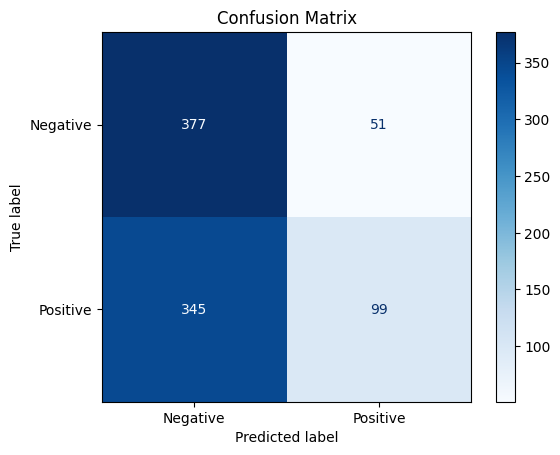

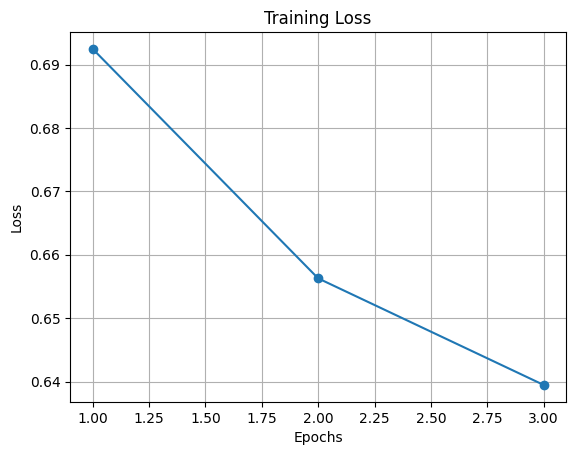

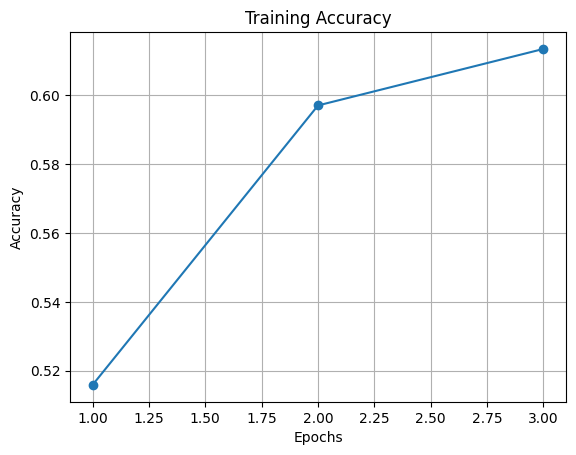

In [11]:
# Evaluate on validation set
bidirectional_model.eval()
all_preds = []
all_labels = []
0
with torch.no_grad():
    for batch_idx, batch in enumerate(validation_dataloader):
        input_ids = batch["input_ids"].to("cuda")
        attention_mask = batch["attention_mask"].to("cuda")
        labels = batch["labels"].to("cuda")

        logits = bidirectional_model(input_ids, attention_mask)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

        if (batch_idx) % 1000 == 0:
            print(f"Validation Batch {batch_idx + 1}: Processed")

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot training loss
plt.figure()
plt.plot(range(1, num_epochs + 1), training_loss, marker="o", label="Train Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Plot training accuracy
plt.figure()
plt.plot(range(1, num_epochs + 1), training_accuracy, marker="o", label="Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

7.

In [12]:
class EncoderUnidirectionalAttentionModel(torch.nn.Module):
    def __init__(self, original_model, direction="left-to-right"):
        super(EncoderUnidirectionalAttentionModel, self).__init__()
        self.encoder = original_model.transformer
        self.direction = direction
        self.attention = nn.MultiheadAttention(embed_dim=original_model.config.n_embd, num_heads=12)
        self.classifier = nn.Linear(original_model.config.n_embd, 2)

    def forward(self, input_ids, attention_mask):
        encoder_outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = encoder_outputs.last_hidden_state

        if self.direction == "left-to-right":
            attn_output, _ = self.attention(hidden_states.permute(1, 0, 2), hidden_states.permute(1, 0, 2).triu(), hidden_states.permute(1, 0, 2))
        elif self.direction == "right-to-left":
            attn_output, _ = self.attention(hidden_states.permute(1, 0, 2), hidden_states.permute(1, 0, 2).tril(), hidden_states.permute(1, 0, 2))
        logits = self.classifier(attn_output[0])
        return logits

# Instantiate the encoder unidirectional attention models
ltr_encoder_model = EncoderUnidirectionalAttentionModel(model, direction="left-to-right").to("cuda")
rtl_encoder_model = EncoderUnidirectionalAttentionModel(model, direction="right-to-left").to("cuda")

print("Encoder-based unidirectional attention models added.")

Encoder-based unidirectional attention models added.


In [15]:
num_epochs = 3
learning_rate = 2e-5

train_dataloader = DataLoader(tokenized_dataset["train"], batch_size=16, shuffle=True)
validation_dataloader = DataLoader(tokenized_dataset["validation"], batch_size=16)
criterion = nn.CrossEntropyLoss()

# Training function

def train_model(model, train_loader, optimizer, criterion, num_epochs, save_name):
    training_loss = []
    training_accuracy = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0

        for batch_idx, batch in enumerate(train_loader):
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["labels"].to("cuda")

            optimizer.zero_grad()
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            if (batch_idx ) % 1000 == 0:
                print(f"Epoch {epoch + 1}, Batch {batch_idx + 1}: Loss = {loss.item():.4f}")

        epoch_accuracy = correct / total
        training_loss.append(epoch_loss / len(train_loader))
        training_accuracy.append(epoch_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {training_loss[-1]:.4f}, Accuracy: {epoch_accuracy:.4f}")

        # Save the model after each epoch
        torch.save(model.state_dict(), f"{save_name}_epoch_{epoch + 1}.pth")
        print(f"Model saved after epoch {epoch + 1}")

    return training_loss, training_accuracy


In [16]:
def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(val_loader):
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["labels"].to("cuda")

            logits = model(input_ids, attention_mask)
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

            if (batch_idx + 1) % 1000 == 0:
                print(f"Validation Batch {batch_idx + 1}: Processed")

    return all_preds, all_labels

In [17]:
# Train left-to-right model
print("Training Left-to-Right Model")
optimizer_ltr = torch.optim.AdamW(ltr_encoder_model.parameters(), lr=learning_rate)
train_loss_ltr, train_acc_ltr = train_model(
    ltr_encoder_model, train_dataloader, optimizer_ltr, criterion, num_epochs, "ltr_encoder_model"
)

# Evaluate left-to-right model
print("Evaluating Left-to-Right Model")
preds_ltr, labels_ltr = evaluate_model(ltr_encoder_model, validation_dataloader)


Training Left-to-Right Model
Epoch 1, Batch 1: Loss = 0.7918
Epoch 1, Batch 1001: Loss = 0.2567
Epoch 1, Batch 2001: Loss = 0.1811
Epoch 1, Batch 3001: Loss = 0.0848
Epoch 1/3, Loss: 0.2722, Accuracy: 0.8856
Model saved after epoch 1
Epoch 2, Batch 1: Loss = 0.1988
Epoch 2, Batch 1001: Loss = 0.2201
Epoch 2, Batch 2001: Loss = 0.1507
Epoch 2, Batch 3001: Loss = 0.3920
Epoch 2/3, Loss: 0.1599, Accuracy: 0.9389
Model saved after epoch 2
Epoch 3, Batch 1: Loss = 0.2027
Epoch 3, Batch 1001: Loss = 0.0234
Epoch 3, Batch 2001: Loss = 0.0173
Epoch 3, Batch 3001: Loss = 0.1676
Epoch 3/3, Loss: 0.1137, Accuracy: 0.9576
Model saved after epoch 3
Evaluating Left-to-Right Model


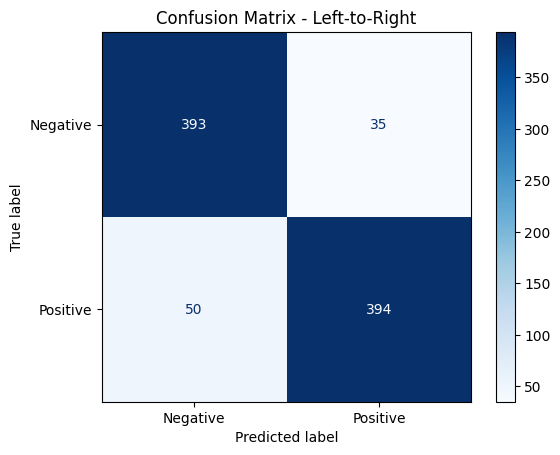

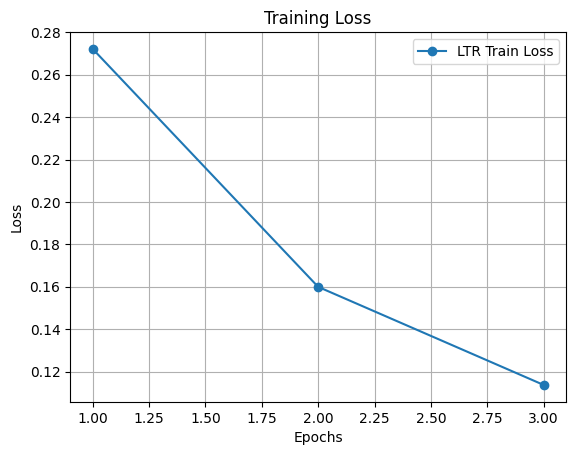

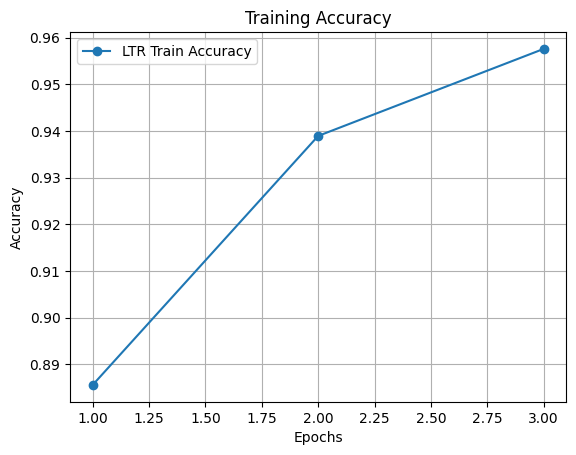

In [18]:
# Plot confusion matrix for Left-to-Right
cm_ltr = confusion_matrix(labels_ltr, preds_ltr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ltr, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Left-to-Right")
plt.show()

# Plot training loss
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_ltr, marker="o", label="LTR Train Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot training accuracy
plt.figure()
plt.plot(range(1, num_epochs + 1), train_acc_ltr, marker="o", label="LTR Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [19]:
# Train right-to-left model
num_epochs = 2
print("Training Right-to-Left Model")
optimizer_rtl = torch.optim.AdamW(rtl_encoder_model.parameters(), lr=learning_rate)
train_loss_rtl, train_acc_rtl = train_model(
    rtl_encoder_model, train_dataloader, optimizer_rtl, criterion, num_epochs, "rtl_encoder_model"
)

# Evaluate right-to-left model
print("Evaluating Right-to-Left Model")
preds_rtl, labels_rtl = evaluate_model(rtl_encoder_model, validation_dataloader)


Training Right-to-Left Model
Epoch 1, Batch 1: Loss = 0.6648
Epoch 1, Batch 1001: Loss = 0.0489
Epoch 1, Batch 2001: Loss = 0.0364
Epoch 1, Batch 3001: Loss = 0.1845
Epoch 1/2, Loss: 0.0895, Accuracy: 0.9683
Model saved after epoch 1
Epoch 2, Batch 1: Loss = 0.1598
Epoch 2, Batch 1001: Loss = 0.0463
Epoch 2, Batch 2001: Loss = 0.0081
Epoch 2, Batch 3001: Loss = 0.0069
Epoch 2/2, Loss: 0.0669, Accuracy: 0.9753
Model saved after epoch 2
Evaluating Right-to-Left Model


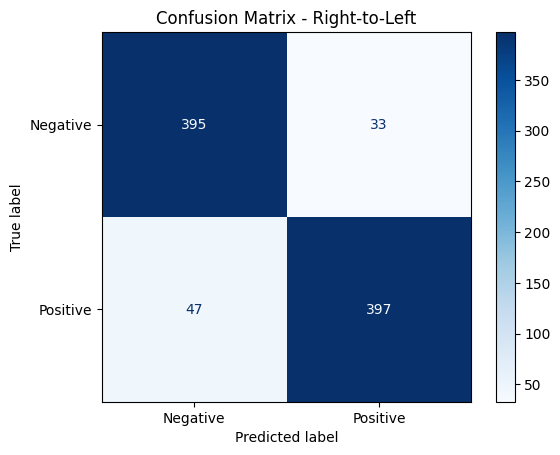

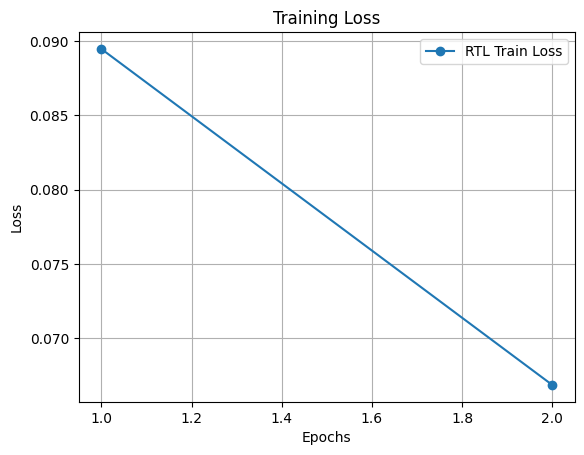

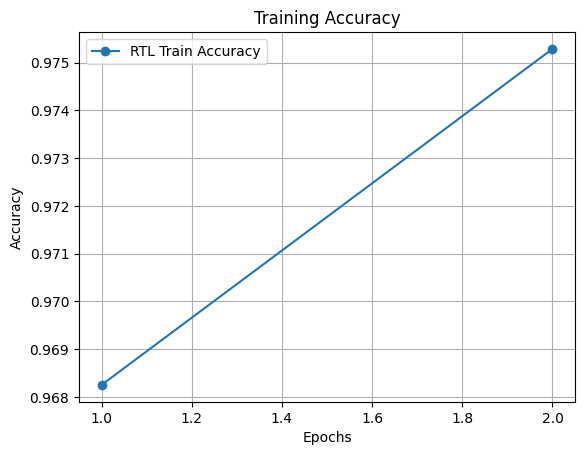

In [20]:
# Plot confusion matrix for Right-to-Left
cm_rtl = confusion_matrix(labels_rtl, preds_rtl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rtl, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Right-to-Left")
plt.show()

# Plot training loss
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_rtl, marker="o", label="RTL Train Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot training accuracy
plt.figure()
plt.plot(range(1, num_epochs + 1), train_acc_rtl, marker="o", label="RTL Train Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

8.

In [29]:
# Step 8: Load a pre-trained fine-tuned BERT model for SST-2
bert_tokenizer = BertTokenizer.from_pretrained("textattack/bert-base-uncased-SST-2")
bert_model = BertForSequenceClassification.from_pretrained("textattack/bert-base-uncased-SST-2").to("cuda")

print("Fine-tuned BERT model and tokenizer loaded successfully for evaluation!")

# Tokenize the validation set for BERT
def tokenize_for_bert(examples):
    return bert_tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

bert_tokenized_dataset = dataset["validation"].map(tokenize_for_bert, batched=True)
bert_tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Create DataLoader for validation set
bert_dataloader = DataLoader(bert_tokenized_dataset, batch_size=16)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Fine-tuned BERT model and tokenizer loaded successfully for evaluation!


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Validation Batch 50: Processed


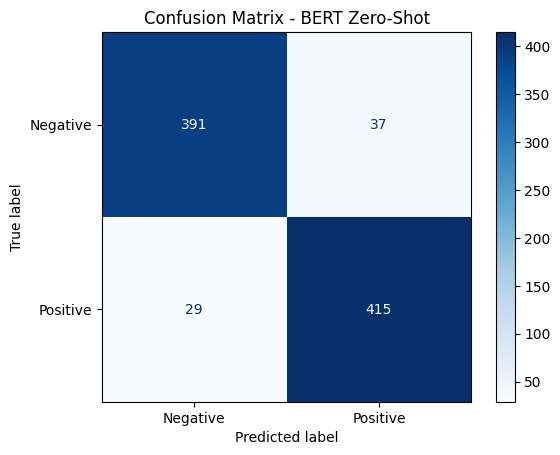

BERT Zero-Shot Accuracy on SST-2 Validation Set: 92.43%


In [30]:
# Evaluation function for BERT

def evaluate_bert_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(dataloader):
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["label"].to("cuda")

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

            if (batch_idx + 1) % 50 == 0:
                print(f"Validation Batch {batch_idx + 1}: Processed")

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, all_preds, all_labels

# Evaluate BERT on the validation set
bert_accuracy, bert_preds, bert_labels = evaluate_bert_model(bert_model, bert_dataloader)

# Plot confusion matrix for BERT
cm = confusion_matrix(bert_labels, bert_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BERT Zero-Shot")
plt.show()

# Print accuracy
print(f"BERT Zero-Shot Accuracy on SST-2 Validation Set: {bert_accuracy * 100:.2f}%")

### Comparative Analysis:

#### **ModifiedGPT2Model**
The `ModifiedGPT2Model` struggles with sentiment classification, showing significant misclassifications. Its reliance on the CLS token alone without additional mechanisms highlights the limitations of this approach in capturing the nuances of sentiment. This model would benefit from extended training or architectural enhancements to improve its performance.


#### **AggregatedGPT2Model**
The `AggregatedGPT2Model` offers a slight improvement over the `ModifiedGPT2Model`. By adding an aggregation layer, it is better equipped to process token-level information. However, its performance still lags behind more sophisticated architectures, indicating that aggregation alone is insufficient for accurate sentiment classification. Longer training and architectural improvements would be necessary to achieve meaningful gains.


#### **BidirectionalAttentionModel**
The `BidirectionalAttentionModel` outperforms the `AggregatedGPT2Model`, leveraging bidirectional attention to better capture contextual relationships in the text. This added complexity allows for more nuanced sentiment predictions, making it a more effective model. While it still falls short of the top-performing models, its results demonstrate the benefits of incorporating bidirectional mechanisms, especially with additional training.


#### **EncoderUnidirectionalAttentionModel**
Both the `Left-to-Right` and `Right-to-Left` encoder models exhibit outstanding performance, significantly surpassing the earlier models. These models excel in sentiment classification due to their ability to focus on sequential relationships in the data. The `Right-to-Left` model performs slightly better, likely due to its reverse processing approach, but both models achieve excellent results with minimal misclassification.


#### **Fine-Tuned BERT**
The fine-tuned BERT model delivers excellent performance, with balanced predictions across both sentiment classes. Its pre-trained embeddings and task-specific fine-tuning enable it to capture sentiment nuances effectively. While the unidirectional attention models rival its performance, BERT’s robustness and generalizability make it a reliable choice for sentiment analysis tasks.



Overall, the `ModifiedGPT2Model` and `AggregatedGPT2Model` require significant additional training and refinement to improve their accuracy. The `BidirectionalAttentionModel` provides a clear step forward, showcasing the benefits of more advanced mechanisms. The encoder-based unidirectional attention models achieve exceptional results, but fine-tuned BERT remains a robust and versatile option for sentiment classification, with performance rivaling that of the best unidirectional models.

---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**